# Non-interactive use of InSegt for fibre segmentation



## Import packages

In [1]:
import insegtpy.models
import PIL
import numpy as np
import urllib.request  # for getting the image from data repository
import matplotlib.pyplot as plt

%matplotlib inline

## Load the image 

Get the image from our data repository. Alternatively, load the image from your computer.

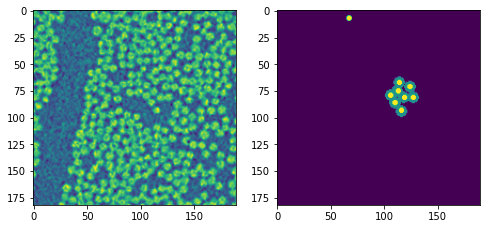

In [2]:
url = 'https://qim.compute.dtu.dk/data-repository/InSegt_data/2D/glass.png'
image = np.array(PIL.Image.open(urllib.request.urlopen(url)))
url = 'https://qim.compute.dtu.dk/data-repository/InSegt_data/2D/glass_labels.png'
labels = np.array(PIL.Image.open(urllib.request.urlopen(url)))

#image = np.array(PIL.Image.open('../data/glass.png'))
#labels = np.array(PIL.Image.open('../data/glass_labels.png'))

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(image)
ax[1].imshow(labels)
plt.show()

## Build and train the model

In [3]:
model = insegtpy.models.sk_basic(image, 
                              patch_size=9, 
                              nr_training_patches=10000, 
                              nr_clusters=100)

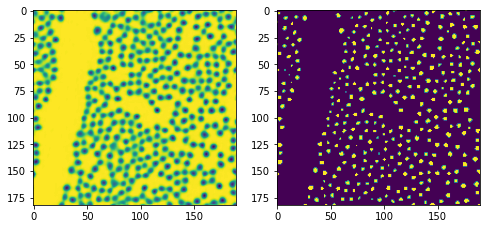

In [4]:
prob = model.process(labels)
seg = insegtpy.utils.segment_probabilities(prob)

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(prob[0])
ax[1].imshow(seg)
plt.show()

## Process another (similar) image

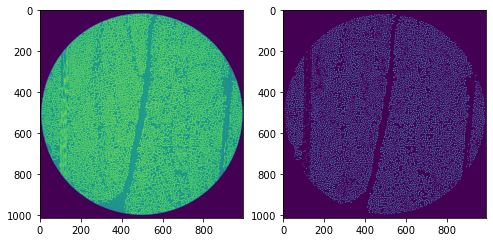

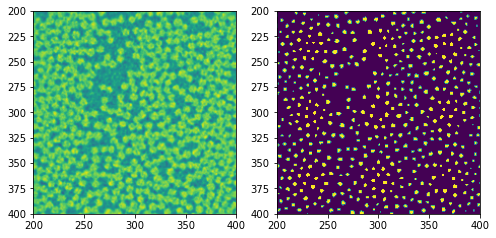

In [5]:
url = 'https://qim.compute.dtu.dk/data-repository/InSegt_data/2D/glass0064.png'
image = np.array(PIL.Image.open(urllib.request.urlopen(url)))

#image = np.array(PIL.Image.open('../data/glass0064.png'))

prob = model.new_image_to_prob(image)
seg = insegtpy.utils.segment_probabilities(prob)

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(image)
ax[1].imshow(seg)

fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].imshow(image)
ax[0].set_xlim(200, 400)
ax[0].set_ylim(400, 200)
ax[1].imshow(seg)
ax[1].set_xlim(200, 400)
ax[1].set_ylim(400, 200)
plt.show()
plt.show()